# Análise e predição da ocorrência de AVC 
UFPB

Disciplina: Introdução à Ciência de Dados

Professor: Yuri Malheiros

Projeto realizado como requisito parcial para conclusão da disciplina de ICD

Alunos: 

    Deivison Rodrigues Jordão
    Lucas Miranda de Aguiar
    Filipe de Medeiros Santos
    

## Introdução:

Este projeto nasce da necessidade de uma maior compreensão dos dados de pacientes com avc disponíveis publicamente sob um ponto de vista estatístico. 
Com os seguintes objetivos:
- Compreender os dados obtidos;
- Buscar relações que possibilitem definir de padrões de ocorrência do avc;
- Aplicar um modelo de aprendizagem de máquina com o fulcro de predizer a probabilidade de ocorrência de um avc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
db = pd.read_csv("healthcare-dataset-stroke-data.csv")
db

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Limpeza e Transformação dos Dados

In [3]:
db.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [4]:
db["bmi"].isnull().sum()

201

In [5]:
db.dropna(inplace=True)

db.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [6]:
db.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [7]:
db.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
db = db.astype({"age": int})

db.age

0       67
2       80
3       49
4       79
5       81
        ..
5104    13
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 4909, dtype: int32

In [9]:
db.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
db.ever_married = db.ever_married.map({'Yes': 1, 'No': 0})

db.ever_married

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 4909, dtype: int64

As colunas que passaram pelos processos de limpeza e transformação de seus dados foram as seguintes:

1. BMI: dado a existência de 201 linhas com dados faltantes, foi realizada a retiradas das respectivas entradas;
2. Smoking Status: nesta coluna foi verificada a existência do valor categórico unknown, contudo, dada a quantidade de ocorrência tais entradas permaneceram inalteradas;
3. Age: os dados presentes nesta coluna tiveram seu tipo alterado de float para int, possibilitando maior eficiência posteriormente;
4. Ever Married: dado que os únicos valores presentes são 'Yes' e 'No', logo, para facilitar a futura manipulação, as entradas foram substituídas para 1 e 0, respectivamente.

## Análise Exploratória

Algumas das colunas do dataset trabalhadas em seguida dispõem de dados categóricos, tornando inviável a aplicação de medidas de centralidade e dispersão a essas colunas. Desta forma, será feita uma análise exploratória inicial com base na contagem da ocorrência dos valores categóricos e o uso de gráficos para facilitar a visualização e entendimento dos dados.

In [11]:
# Medidas de centralidade e dispersão relacionadas ao dataset

def medidas(data):
    mean = np.mean(data)
    median = data.median()
    variance = np.var(data)
    std_deviation = np.std(data)
    dict_medidas = {"Média":mean,"Mediana":median,"Variância":variance,"Desvio Padrão":std_deviation}
    return pd.DataFrame(dict_medidas).T

### 1. Idade

#### 1.1 Idade Geral

In [12]:
stroke_1 = db[db["stroke"] == 1]
stroke_0 = db[db["stroke"] == 0]
pred_db = pd.concat([stroke_0[400:609], stroke_1])

In [13]:
age = db[["age"]]

medidas(age)

,age
Média,42.854145
Mediana,44.000000
Variância,509.571311
Desvio Padrão,22.573686


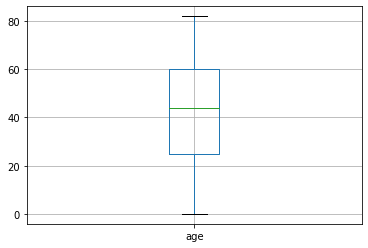

In [14]:
age.boxplot();

#### 1.2 Idade dos indivíduos que sofreram AVC

In [15]:
age_1 = stroke_1[["age"]]
medidas(age_1)

,age
Média,67.712919
Mediana,70.000000
Variância,153.094618
Desvio Padrão,12.373141


Temos que a média aumenta consideravelmente, e se concentrando entre os idosos

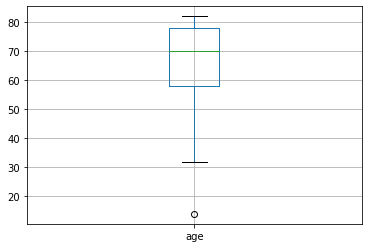

In [16]:
age_1.boxplot();

#### 1.3 Idades dos indivíduos que não sofreram AVC

In [17]:
age_0 = stroke_0[["age"]]
medidas(age_0)

,age
Média,41.748723
Mediana,43.000000
Variância,496.721754
Desvio Padrão,22.287255


<AxesSubplot:>

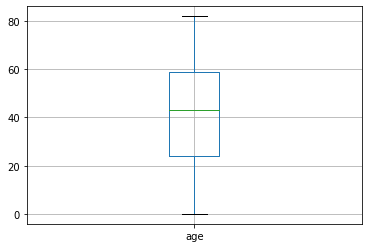

In [18]:
age_0.boxplot()

### 2. Relação com hypertensão

#### 2.1 Hypertensão geral

In [19]:
hypertension = db[["hypertension"]].value_counts()
hypertension

hypertension
0               4458
1                451
dtype: int64

#### 2.2 Relação entre quem tem hypertensão e tiveram avc

In [20]:
hypertension_1 = stroke_1["hypertension"].value_counts()
hypertension_1

0    149
1     60
Name: hypertension, dtype: int64

#### 2.3 Relação entre hypertensão e não tiveram avc

In [21]:
hypertension_0 = stroke_0["hypertension"].value_counts()
hypertension_0

0    4309
1     391
Name: hypertension, dtype: int64

### 3. Nível de Glicose

#### 3.1 Nível de Glicose Geral

In [22]:
glicose = db[["avg_glucose_level"]]
medidas(glicose)

,avg_glucose_level
Média,105.305150
Mediana,91.680000
Variância,1973.120022
Desvio Padrão,44.419816


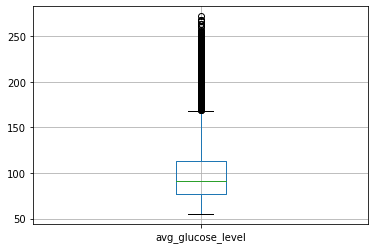

In [23]:
glicose.boxplot();

#### 3.2 Nivel de glicose dos indivíduos que sofreram AVC

In [24]:
glicose_1 = stroke_1[["avg_glucose_level"]]
medidas(glicose_1)

,avg_glucose_level
Média,134.571388
Mediana,106.580000
Variância,3882.839798
Desvio Padrão,62.312437


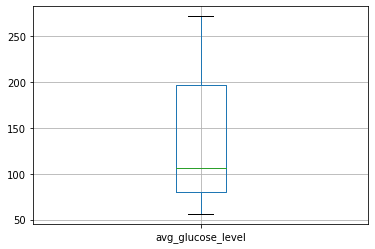

In [25]:
glicose_1.boxplot();

#### 3.3 Nivel de glicose dos indivíduos que não sofreram AVC

In [26]:
glicose_0 = stroke_0[["avg_glucose_level"]]
medidas(glicose_0)

,avg_glucose_level
Média,104.003736
Mediana,91.210000
Variância,1848.417285
Desvio Padrão,42.993224


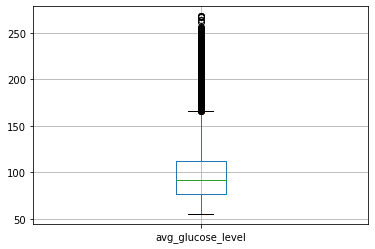

In [27]:
glicose_0.boxplot();

Observa-se que a média também é um pouco mais alta em indíviduo que tiveram o avc, contendo outliers em não tiveram.

### 4. Com Relação ao Hábito de Fumar

In [28]:
smoking_status = db["smoking_status"].value_counts()
smoking_status

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

#### 4.1 Status de fumantes que tiveram avc

In [29]:
smoke_status_1 = stroke_1["smoking_status"].value_counts().T
smoke_status_1

never smoked       84
formerly smoked    57
smokes             39
Unknown            29
Name: smoking_status, dtype: int64

#### 4.2 Status de fumante que não tiveram avc

In [30]:
smoke_status_0 = stroke_0["smoking_status"].value_counts().T
smoke_status_0

never smoked       1768
Unknown            1454
formerly smoked     780
smokes              698
Name: smoking_status, dtype: int64

Pessoas nunca fumaram se faz maioria, já que é grande parte de nosso dataset

### 5. Em Relação a Localidade

#### 5.1 De todo o dataset

In [31]:
residence = db["Residence_type"].value_counts().T
residence

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

#### 5.2 Pessoas que não sofreram ataque cardíaco e sua localidade

In [32]:
residence_0 = stroke_0["Residence_type"].value_counts().T
residence_0

Urban    2381
Rural    2319
Name: Residence_type, dtype: int64

Podemos ver que os moradores que não sofreram ataque cardíacos estão bem distribuídas:

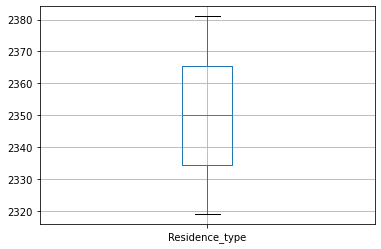

In [33]:
residence_0.to_frame().boxplot();

#### 5.3 Pessoas que sofreram AVC e sua localidade

In [34]:
residence_1 = stroke_1["Residence_type"].value_counts()
residence_1

Urban    109
Rural    100
Name: Residence_type, dtype: int64

Pessoas que moram na cidade tendem um pouco mais ter avc, mas nada muito significativo.

### 6. Em Relação ao IMC

#### 6.1 De todo o dataset

In [35]:
bmi = db["bmi"].to_frame()
medidas(bmi)

,bmi
Média,28.893237
Mediana,28.100000
Variância,61.673798
Desvio Padrão,7.853267


#### 6.2 IMC de pessoas que não tiveram ataque cardíaco

In [36]:
bmi_0 = stroke_0['bmi'].to_frame()
bmi_0.head()

,bmi
249,18.0
250,39.2
251,17.6
252,35.9
253,19.1


In [37]:
medidas(bmi_0)

,bmi
Média,28.823064
Mediana,28.000000
Variância,62.527698
Desvio Padrão,7.907446


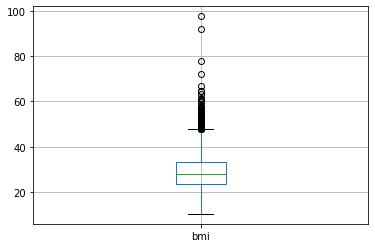

In [38]:
# Presença de vários outliers

bmi_0.boxplot();

#### 6.3 IMC de pessoas que tiveram avc

In [39]:
bmi_1 = stroke_1['bmi'].to_frame();bmi_1

,bmi
0,36.6
2,32.5
3,34.4
4,24.0
5,29.0
...,...
243,40.5
244,36.7
245,30.9
246,29.3


In [40]:
# Os dados não tem tanta variação, o que facilita o entendimento

medidas(bmi_1)

,bmi
Média,30.471292
Mediana,29.700000
Variância,39.870276
Desvio Padrão,6.314291


Temos que pessoas que tiveram avc tem uma média maior

### 7. Em Relação à doença cardíaca (heart disease)

#### 7.1 De todo o dataset

In [41]:
heart_disease = db["heart_disease"].value_counts().to_frame()
heart_disease.rename({0: "No stroke", 1:"stroke"}, axis='index', inplace=True)

heart_disease["heart_disease_perc"] =  heart_disease["heart_disease"] / heart_disease["heart_disease"].sum() * 100
heart_disease

,heart_disease,heart_disease_perc
No stroke,4666,95.049908
stroke,243,4.950092


#### 7.2 Doença cardíaca e sua influencia no avc

In [42]:
heart_disease_0 = db[db.stroke == 0]
heart_disease_0 = heart_disease_0["heart_disease"].value_counts()
heart_disease_1 = db[db.stroke == 1]
heart_disease_1 = heart_disease_1["heart_disease"].value_counts()

heart = pd.DataFrame({"Heart Disease - V": heart_disease_1,
                     "Heart Disease - F": heart_disease_0})
heart = heart.rename({1: "Teve Avc", 0: "Não teve avc"}, axis='index')

heart

,Heart Disease - V,Heart Disease - F
Não teve avc,169,4497
Teve Avc,40,203


Poucos indivíduos que tiveram avc tem doença cardíaca, olhando pelo percentual a diferença é um pouco mais significativa
- 4% Dos indivíduos que tem AVC não tem doença cardíaca
- 19% Dos indivíduos que tem AVC não tem doença cardíaca

Cerca de 15% a mais.

### 7. Em Relação à Coluna Gênero

In [43]:
gender = db["gender"]
gender.head()

0      Male
2      Male
3    Female
4    Female
5      Male
Name: gender, dtype: object

In [44]:
# Verificando a prevalência de gênero na base de dados

gender = gender.value_counts().to_frame()
gender

,gender
Female,2897
Male,2011
Other,1


In [45]:
# Incluindo a porcentagem de ocorrência por gênero

gender["gender_perc"] = gender["gender"] / gender["gender"].sum() * 100
gender

,gender,gender_perc
Female,2897,59.014056
Male,2011,40.965573
Other,1,0.020371


In [46]:
gender_1 = stroke_1["gender"]
gender_1.head()

0      Male
2      Male
3    Female
4    Female
5      Male
Name: gender, dtype: object

In [47]:
gender["gender_1"] = gender_1.value_counts()
gender["gender_perc_1"] = gender["gender_1"] / gender["gender_1"].sum() * 100

gender

,gender,gender_perc,gender_1,gender_perc_1
Female,2897,59.014056,120.0,57.416268
Male,2011,40.965573,89.0,42.583732
Other,1,0.020371,NaN,NaN


In [48]:
# Incluindo uma coluna com relação por gênero dos indivíduos que não tiveram AVC

gender['gender_0'] = gender['gender'] - gender['gender_1']
gender

,gender,gender_perc,gender_1,gender_perc_1,gender_0
Female,2897,59.014056,120.0,57.416268,2777.0
Male,2011,40.965573,89.0,42.583732,1922.0
Other,1,0.020371,NaN,NaN,NaN


### 8. Em Relação ao Estado Civil

In [49]:
married = db["ever_married"].map({1: 'Casou', 0: 'Não casou'})
married.head()

0    Casou
2    Casou
3    Casou
4    Casou
5    Casou
Name: ever_married, dtype: object

In [50]:
# Verificando a prevalência de pessoas que já foram casadas na base de dados

married = married.value_counts().to_frame()
married

,ever_married
Casou,3204
Não casou,1705


In [51]:
# Incluindo a porcentagem de ocorrência

married["married_perc"] = married["ever_married"] / married["ever_married"].sum() * 100
married

,ever_married,married_perc
Casou,3204,65.267875
Não casou,1705,34.732125


In [52]:
married_1 = stroke_1["ever_married"].map({1:'Casou', 0:'Não casou'})
married_1.head()

0    Casou
2    Casou
3    Casou
4    Casou
5    Casou
Name: ever_married, dtype: object

In [53]:
# Verificando a prevalência de pessoas que já foram casadas nas entradas em que houveram a ocorrência de AVC
# Incluindo a porcentagem no dataframe

married["ever_married_1"] = married_1.value_counts()
married["married_perc_1"] = married["ever_married_1"] / married["ever_married_1"].sum() * 100

married

,ever_married,married_perc,ever_married_1,married_perc_1
Casou,3204,65.267875,186,88.995215
Não casou,1705,34.732125,23,11.004785


### 9. Tipo de Trabalho 

In [54]:
work = db["work_type"]
work.head()

0          Private
2          Private
3          Private
4    Self-employed
5          Private
Name: work_type, dtype: object

In [55]:
work = work.value_counts().to_frame()
work

,work_type
Private,2811
Self-employed,775
children,671
Govt_job,630
Never_worked,22


In [56]:
# Incluindo a porcentagem de ocorrência por tipo de trabalho

work["work_perc"] = work["work_type"] / work["work_type"].sum() * 100
work

,work_type,work_perc
Private,2811,57.262172
Self-employed,775,15.787329
children,671,13.668772
Govt_job,630,12.833571
Never_worked,22,0.448156


In [57]:
work_1 = stroke_1["work_type"]
work_1.head()

0          Private
2          Private
3          Private
4    Self-employed
5          Private
Name: work_type, dtype: object

In [58]:
# Verificando a prevalência pelo tipo de trabalho das entradas em que houveram a ocorrência de AVC
# Incluindo a porcentagem no dataframe

work["work_type_1"] = work_1.value_counts()
work["work_perc_1"] = work["work_type_1"] / work["work_type_1"].sum() * 100

work

,work_type,work_perc,work_type_1,work_perc_1
Private,2811,57.262172,127.0,60.765550
Self-employed,775,15.787329,53.0,25.358852
children,671,13.668772,1.0,0.478469
Govt_job,630,12.833571,28.0,13.397129
Never_worked,22,0.448156,NaN,NaN


## Vizualização dos Dados

### 1. Age

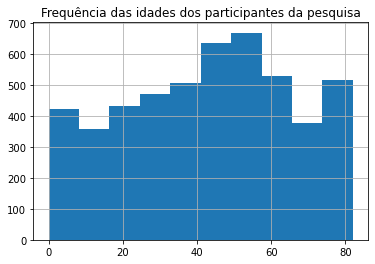

In [59]:
age.hist();
plt.title("Frequência das idades dos participantes da pesquisa");

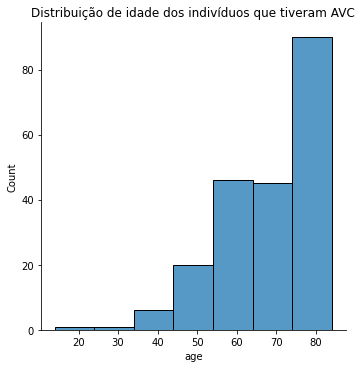

In [60]:
sns.displot(age_1,x="age",binwidth = 10)
plt.title("Distribuição de idade dos indivíduos que tiveram AVC");

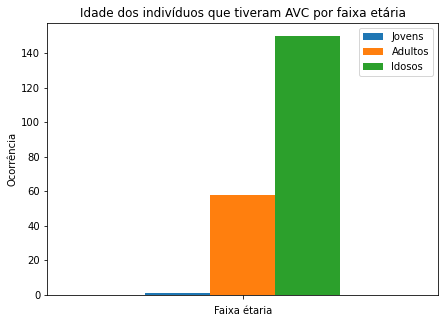

In [61]:
age_1_count = age_1.value_counts().reset_index()

age_1_count_jovens = age_1_count[age_1_count.age < 19]
age_1_count_adulto = age_1_count[age_1_count.age < 60].sum() - age_1_count_jovens
age_1_count_idoso = age_1_count[age_1_count.age > 59].sum()

age_group = pd.DataFrame([{"Jovens": age_1_count_jovens.iloc[0,1], "Adultos": age_1_count_adulto.iloc[0,1], "Idosos":age_1_count_idoso[0]}])
age_group = age_group.rename({0 :""}, axis='index')
age_group.plot.bar(rot=0, title='Idade dos indivíduos que tiveram AVC por faixa etária',
                   figsize=(7,5), ylabel='Ocorrência' , xlabel='Faixa étaria');

No gráfico acima verificamos as ocorrências de AVC conforme a idade, ficando nítido que, com o aumento da idade se intensifica os casos de AVC, demonstrando assim uma correlação entre idade e o risco de AVC, sendo, portanto, os idosos os mais afetados.

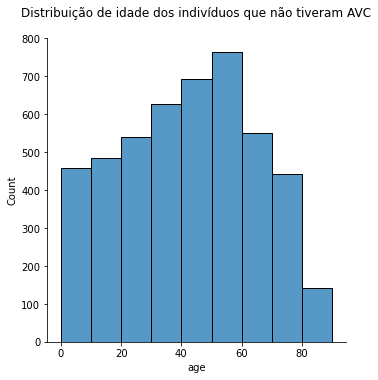

In [62]:
sns.displot(age_0,x="age",binwidth = 10);
plt.title("Distribuição de idade dos indivíduos que não tiveram AVC\n");

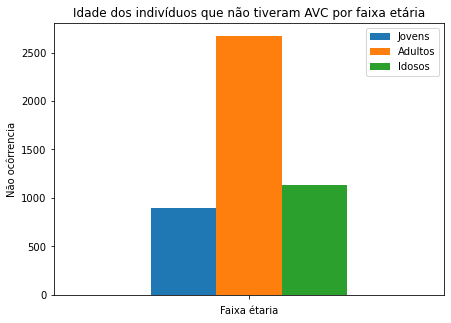

In [63]:
age_0_count = age_0.value_counts().reset_index()

age_0_count_jovens = age_0_count[age_0_count.age < 19].sum()
age_0_count_adulto = age_0_count[age_0_count.age < 60].sum() - age_0_count_jovens
age_0_count_idoso = age_0_count[age_0_count.age > 59].sum()

age_0_group = pd.DataFrame([{"Jovens": age_0_count_jovens[0], "Adultos": age_0_count_adulto[0], "Idosos": age_0_count_idoso[0]}])
age_0_group = age_0_group.rename({0 :""}, axis='index')
age_0_group.plot.bar(rot=0, title='Idade dos indivíduos que não tiveram AVC por faixa etária',
                     figsize=(7,5), ylabel='Não ocôrrencia' , xlabel='Faixa étaria');

### 2. Hypertension

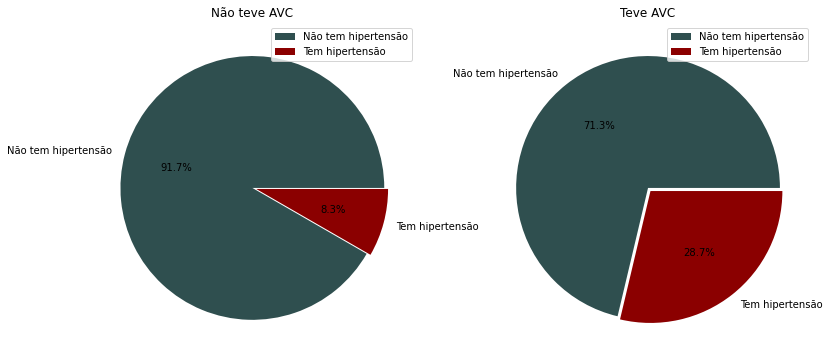

In [64]:
hypertension = pd.DataFrame({'Não teve AVC': hypertension_0, 'Teve AVC': hypertension_1})
hypertension = hypertension.rename({1: "Tem hipertensão", 0: "Não tem hipertensão"}, axis='index')
hypertension = hypertension.plot.pie(subplots= True, figsize= (13,7), explode=(0, 0.03),
                               autopct='%1.1f%%',colors= ['darkslategray','darkred'])
hypertension[0].set_ylabel("")
hypertension[1].set_ylabel("")
hypertension[0].set_title("Não teve AVC")
hypertension[1].set_title("Teve AVC");

### 3. Avg glucose level

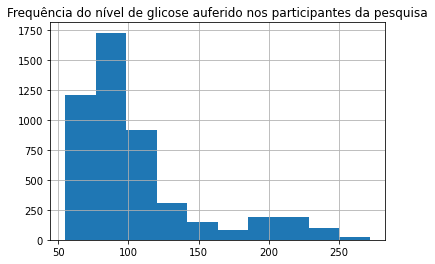

In [65]:
glicose.hist();
plt.title("Frequência do nível de glicose auferido nos participantes da pesquisa");

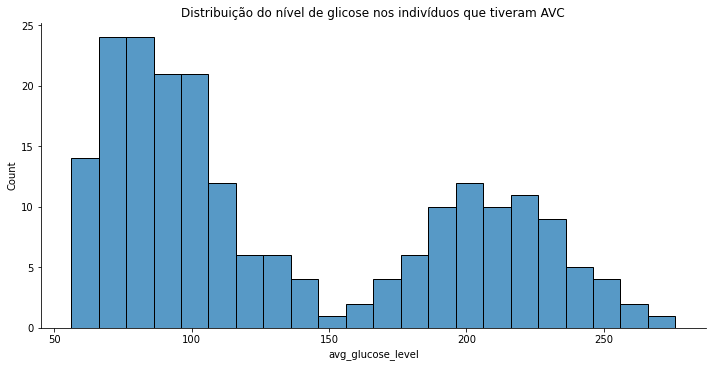

In [66]:
sns.displot(glicose_1,x="avg_glucose_level",binwidth = 10, height=5, aspect=2)
plt.title("Distribuição do nível de glicose nos indivíduos que tiveram AVC");

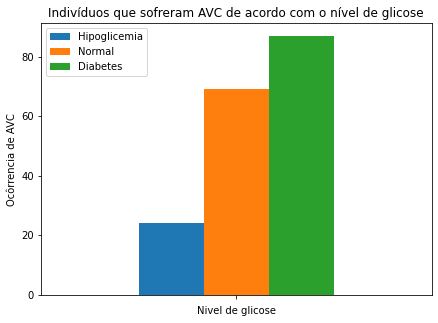

In [67]:
glicose_1_count = glicose_1.value_counts().reset_index()

glicose_1_count_baixa = glicose_1_count[glicose_1_count.avg_glucose_level < 71].sum()
glicose_1_count_normal = glicose_1_count[glicose_1_count.avg_glucose_level < 100].sum() - glicose_1_count_baixa
glicose_1_count_alta = glicose_1_count[glicose_1_count.avg_glucose_level > 125].sum()

df_glicose_1_count = pd.DataFrame([{"Hipoglicemia": glicose_1_count_baixa[0], "Normal": glicose_1_count_normal[0], "Diabetes":glicose_1_count_alta[0]}])
df_glicose_1_count = df_glicose_1_count.rename({0 :""}, axis='index')
df_glicose_1_count.plot.bar(rot=0, title='Indivíduos que sofreram AVC de acordo com o nível de glicose',
                            figsize=(7,5), ylabel='Ocôrrencia de AVC' , xlabel='Nivel de glicose');

Ao analisar os gráficos acima, nota-se uma tendência ao aumento nos casos de AVC com relação ao nivel de glicose. Pode-se inferir, pelos gráficos acima, que, indíviduos que sofrem de diabetes têm uma forte tendência a também sofrer de AVC.

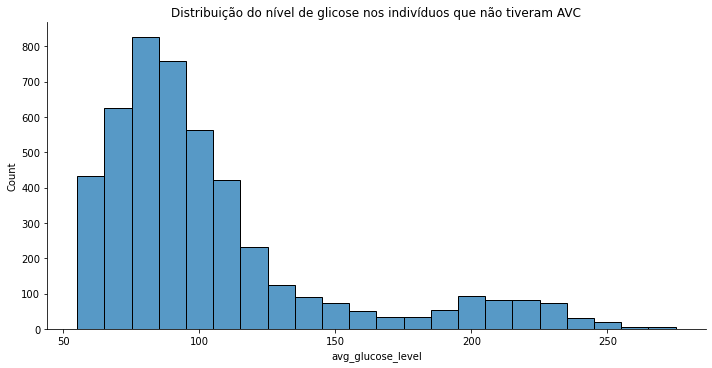

In [68]:
sns.displot(glicose_0,x="avg_glucose_level",binwidth = 10, aspect=2)
plt.title("Distribuição do nível de glicose nos indivíduos que não tiveram AVC");

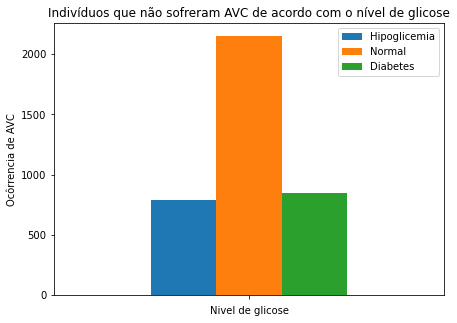

In [69]:
glicose_0_count = glicose_0.value_counts().reset_index()

glicose_0_count_baixa = glicose_0_count[glicose_0_count.avg_glucose_level < 71].sum()
glicose_0_count_normal = glicose_0_count[glicose_0_count.avg_glucose_level < 100].sum() - glicose_0_count_baixa
glicose_0_count_alta = glicose_0_count[glicose_0_count.avg_glucose_level > 125].sum()

df_glicose_0_count = pd.DataFrame([{"Hipoglicemia": glicose_0_count_baixa[0], "Normal": glicose_0_count_normal[0], "Diabetes":glicose_0_count_alta[0]}])
df_glicose_0_count = df_glicose_0_count.rename({0 :""}, axis='index')
df_glicose_0_count.plot.bar(rot=0, title='Indivíduos que não sofreram AVC de acordo com o nível de glicose', figsize=(7,5), ylabel='Ocôrrencia de AVC' , xlabel='Nivel de glicose');

### 4. Smoking status

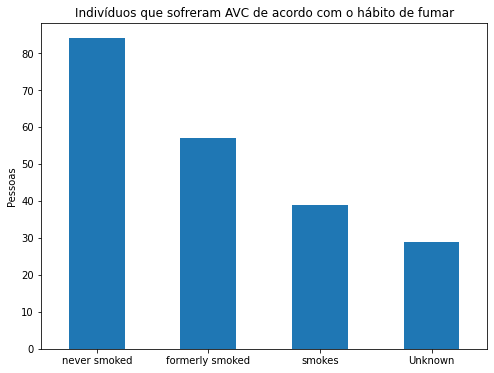

In [70]:
smoke_status_1.plot.bar(rot=0, ylabel="Pessoas", title="Indivíduos que sofreram AVC de acordo com o hábito de fumar",
                      figsize=(8,6));

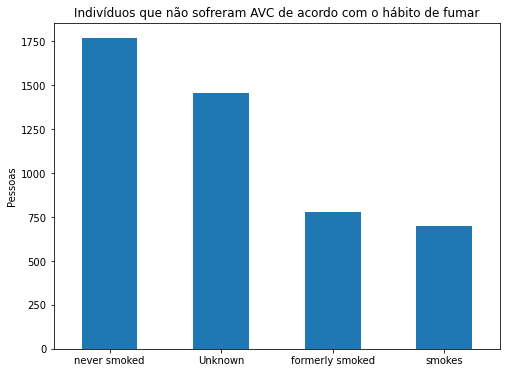

In [71]:
smoke_status_0.plot.bar(rot=0, ylabel ="Pessoas",title = "Indivíduos que não sofreram AVC de acordo com o hábito de fumar",
                      figsize=(8,6));

Dados demonstram que pessoas que fumam tem mais chances de ter AVC do que as que não tem esse hábito.

### 5. Residence type

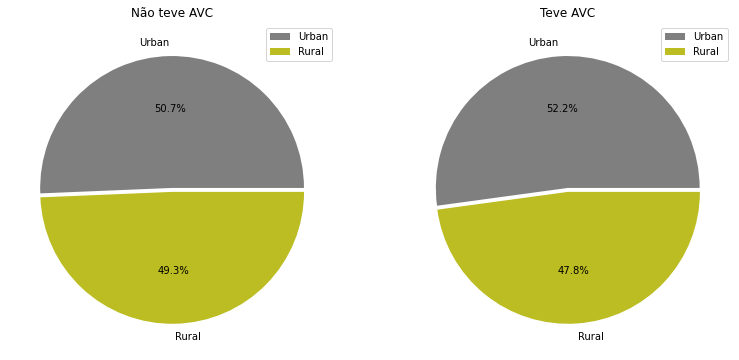

In [72]:
# Pessoas que moram na cidade tem uma porcentagem maior de ter avc

residence = pd.DataFrame({'Não teve AVC': residence_0, 'Teve AVC': residence_1})
residence = residence.plot.pie(subplots= True, figsize= (13,7), explode=(0, 0.03),
                               autopct='%1.1f%%',colors= ['tab:gray','tab:olive'])

residence[0].set_ylabel("")
residence[1].set_ylabel("")
residence[0].set_title("Não teve AVC")
residence[1].set_title("Teve AVC");

### 6. BMI (Body mass index)

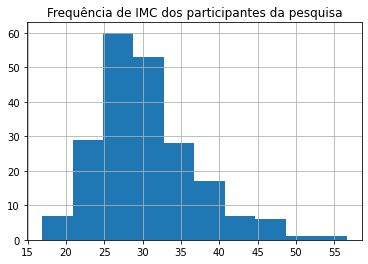

In [73]:
bmi_1.hist()
plt.title("Frequência de IMC dos participantes da pesquisa");

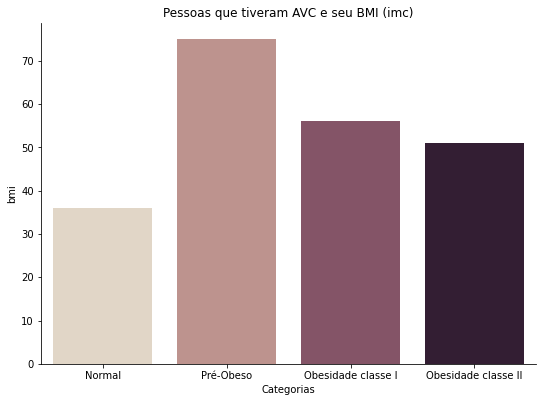

In [74]:
bmi_group = bmi_1["bmi"].value_counts()

bmi_group_1 = bmi_group[bmi_group.index < 25].sum()
bmi_group_2 = bmi_group[bmi_group.index < 30].sum() - bmi_group_1
bmi_group_3 = bmi_group[bmi_group.index < 35].sum() -  (bmi_group_2 + bmi_group_1)
bmi_group_4 = bmi_group[bmi_group.index > 34].sum()

bmi_group_df = pd.DataFrame([{"Normal": bmi_group_1, "Pré-Obeso": bmi_group_2, 
                          "Obesidade classe I": bmi_group_3, "Obesidade classe II": bmi_group_4}])
bmi_group_df = bmi_group_df.rename({0 :"BMI"}, axis='columns')
bmi_group_df = sns.catplot(data=bmi_group_df,palette="ch:.25", kind="bar", height=5.27, aspect=11.7/8.27)
bmi_group_df.set(xlabel='Categorias', ylabel='bmi', title='Pessoas que tiveram AVC e seu BMI (imc)');

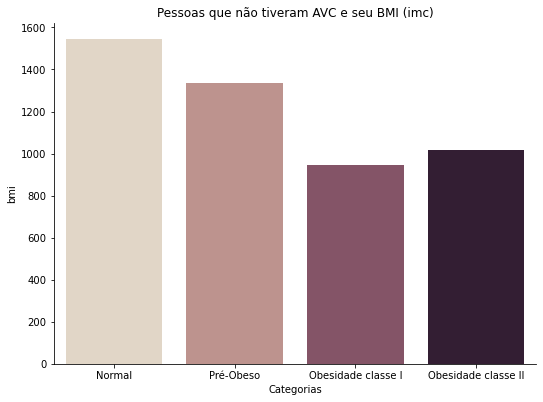

In [75]:
bmi_group_0 = bmi_0["bmi"].value_counts().to_frame()

bmi_group_0 = bmi_group_0.dropna()
bmi1 = bmi_group_0[bmi_group_0.index < 25].sum()
bmi2 = bmi_group_0[bmi_group_0.index < 30].sum() - bmi1
bmi3 = bmi_group_0[bmi_group_0.index < 35].sum() -  (bmi2 + bmi1)
bmi4 = bmi_group_0[bmi_group_0.index > 34].sum()

df_bmi_group_0 = pd.DataFrame([{"Normal": bmi1[0], "Pré-Obeso": bmi2[0],
                          "Obesidade classe I":bmi3[0], "Obesidade classe II": bmi4[0]}])

ax = sns.catplot(data=df_bmi_group_0,palette="ch:.25", kind="bar", height=5.27, aspect=11.7/8.27)
ax.set(xlabel='Categorias', ylabel='bmi', title='Pessoas que não tiveram AVC e seu BMI (imc)');

### 7. Heart disease (Doença cardíaca)

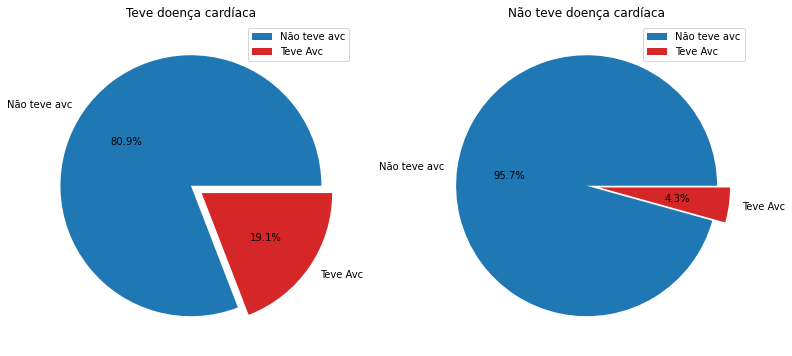

In [76]:
# Observamos que existe um número elevado de pessoas sem problemas do coração, o que prejudica a análise
# Trabalhemos, portanto com percentual

ax_heart = heart.plot.pie(subplots=True, figsize= (13,6), ylabel='', 
                          explode=(0, 0.1), autopct='%1.1f%%', colors=['tab:blue','tab:red']);

ax_heart[0].set_title("Teve doença cardíaca")
ax_heart[1].set_title("Não teve doença cardíaca");

### 8. Gender (gênero)

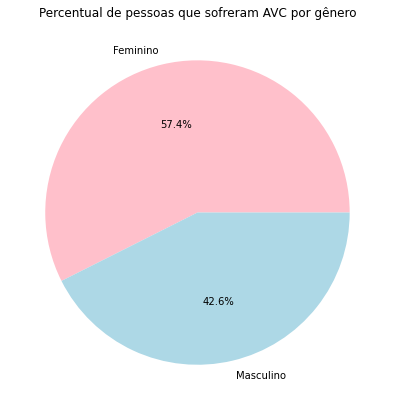

In [77]:
gender["gender_perc_1"].dropna().plot.pie(title="Percentual de pessoas que sofreram AVC por gênero",
                                 ylabel='', colors=['pink', 'lightblue'], autopct='%1.1f%%',
                                 labels=["Feminino", "Masculino", ""], figsize=(13,7));

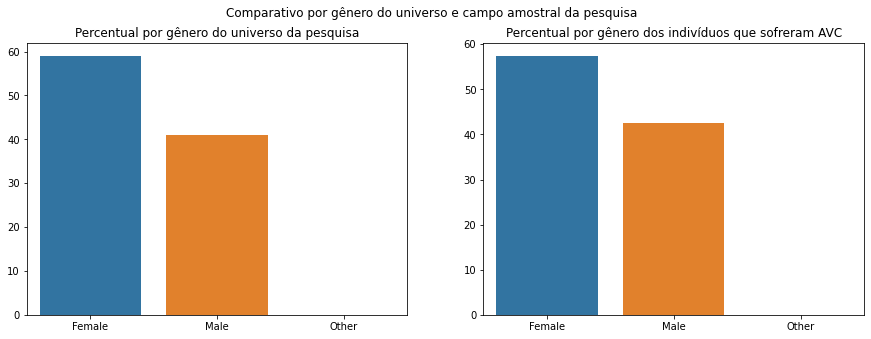

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Comparativo por gênero do universo e campo amostral da pesquisa')

sns.barplot(ax=axes[0], x=gender.index, y='gender_perc', data=gender)
axes[0].set_title('Percentual por gênero do universo da pesquisa')
axes[0].set_ylabel('')

sns.barplot(ax=axes[1], x=gender.index, y='gender_perc_1', data=gender)
axes[1].set_title('Percentual por gênero dos indivíduos que sofreram AVC')
axes[1].set_ylabel('');

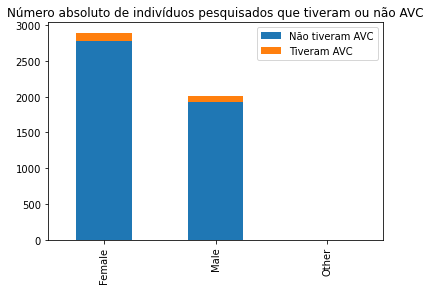

In [79]:
ax = gender[['gender_0', 'gender_1']].plot.bar(stacked=True)

ax.legend(["Não tiveram AVC", "Tiveram AVC"])
plt.title("Número absoluto de indivíduos pesquisados que tiveram ou não AVC");

### 9. Ever married (Estado civil)

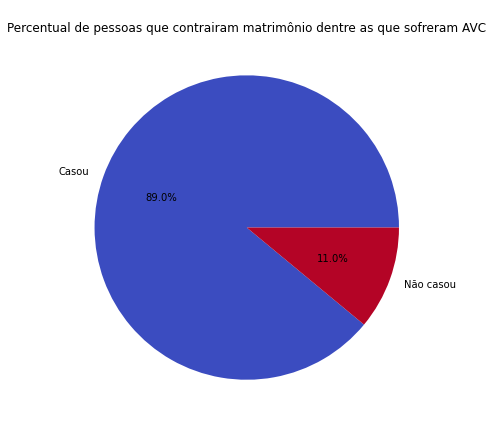

In [80]:
married["married_perc_1"].plot.pie(title="\nPercentual de pessoas que contrairam matrimônio dentre as que sofreram AVC",
                                   ylabel='', colormap="coolwarm", figsize=(10,7),autopct='%1.1f%%');

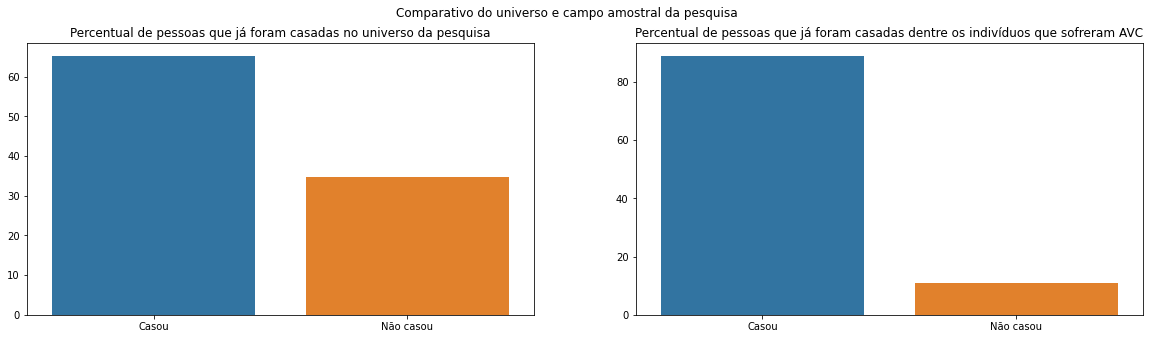

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Comparativo do universo e campo amostral da pesquisa')

sns.barplot(ax=axes[0], x=married.index, y='married_perc', data=married)
axes[0].set_title('Percentual de pessoas que já foram casadas no universo da pesquisa')
axes[0].set_ylabel('')

sns.barplot(ax=axes[1], x=married.index, y='married_perc_1', data=married)
axes[1].set_title('Percentual de pessoas que já foram casadas dentre os indivíduos que sofreram AVC')
axes[1].set_ylabel('');

### 10. Work type(Tipo de trabalho)

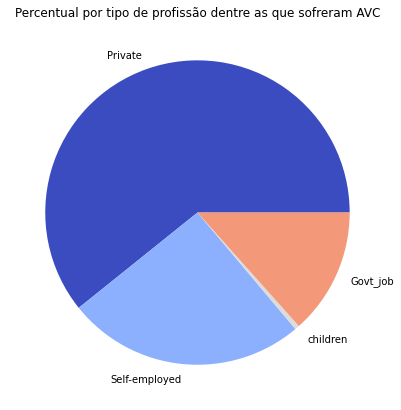

In [82]:
work["work_perc_1"].plot.pie(title="Percentual por tipo de profissão dentre as que sofreram AVC", ylabel='',
                             colormap="coolwarm", figsize=(10,7));

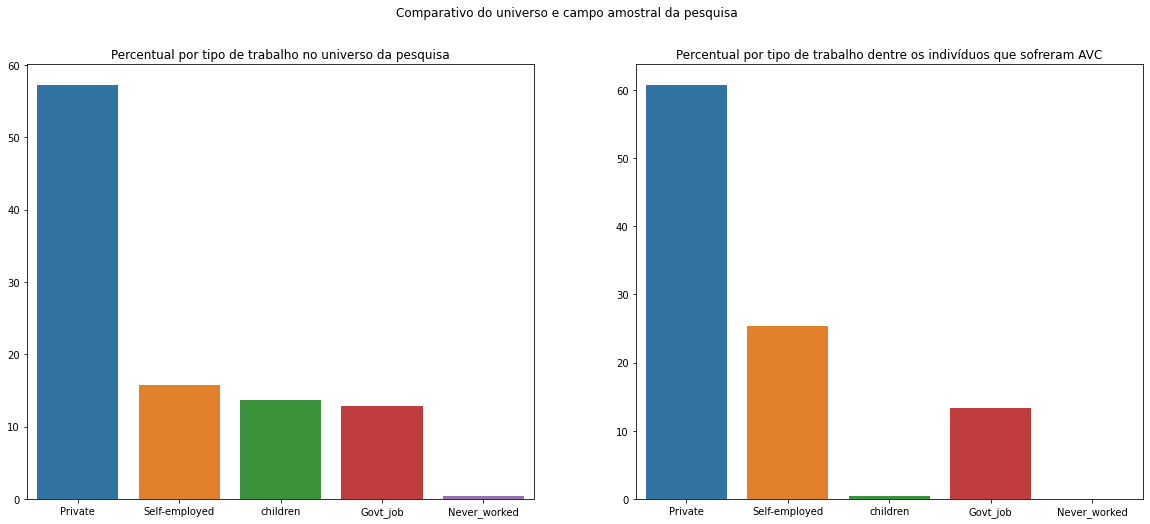

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Comparativo do universo e campo amostral da pesquisa')

sns.barplot(ax=axes[0], x=work.index, y='work_perc', data=work)
axes[0].set_title('Percentual por tipo de trabalho no universo da pesquisa')
axes[0].set_ylabel('')

sns.barplot(ax=axes[1], x=work.index, y='work_perc_1', data=work)
axes[1].set_title('Percentual por tipo de trabalho dentre os indivíduos que sofreram AVC')
axes[1].set_ylabel('');

# Agrupamentos

In [84]:
# Função para plotar gráficos de dispersão de acordo com os grupos formados

def group_Kmeans(df,X,Y,n):
    group = df[[X,Y]]
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(group)
    sns.scatterplot(data=group, x=X, y=Y, hue=kmeans.labels_, palette="muted")


In [85]:
db["gender"] = db["gender"].replace(['Female', 'Male', 'Other'], [0, 1,2]);

In [86]:
db['work_type'] = db['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
                                                    [0, 1, 2, 3, 4])

In [87]:
db['Residence_type'] = db['Residence_type'].replace(['Urban', 'Rural'], [0, 1])

In [88]:
db["smoking_status"] = db["smoking_status"].replace(['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
                                                            [0, 1, 2, 3])

In [89]:
stroke_1 = db[db.stroke == 1]
stroke_0 = db[db.stroke == 0]
db.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,0,0,228.69,36.6,2,1
2,31112,1,80,0,1,1,0,1,105.92,32.5,0,1
3,60182,0,49,0,0,1,0,0,171.23,34.4,3,1
4,1665,0,79,1,0,1,1,1,174.12,24.0,0,1
5,56669,1,81,0,0,1,0,0,186.21,29.0,2,1


## Idade

Agrupamento os dados apartir das colunas **age(idade)** e **bmi(imc)**:

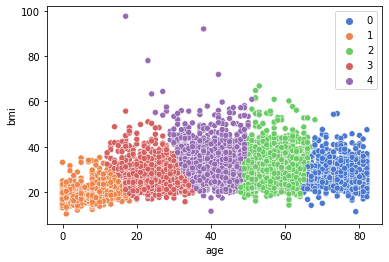

In [90]:
# Com relação a todo o database

group_Kmeans(db,"age", "bmi",5)

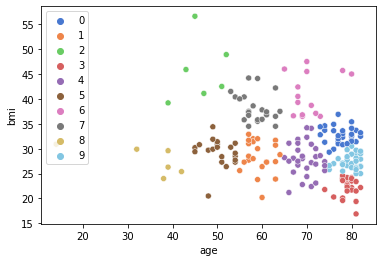

In [91]:
# Com relação aos indivíduos que tiveram AVC

group_Kmeans(stroke_1,"age", "bmi", 10)

Aumento do BMI conforme a idade, chengando ao ápice por volta do 40 anos e reduzindo novamente.

Agrupando os dados apartir das colunas **age (idade)** e **avg_glucose_level (nível de glicose)**:

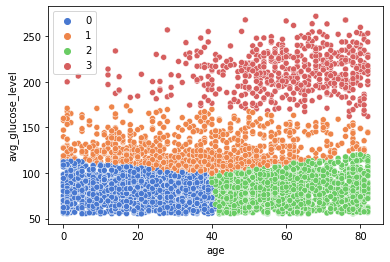

In [92]:
# Com relação a todo o database

group_Kmeans(db,"age", "avg_glucose_level",4)

Vemos grarios grupos: jovens e adultos(0 a 40) com glicose baixa,jovens e adultos(0 a 40) com glicose alta,indivíduos com glicose normal,adultos e idosos(40 a 80) com glicose baixa e adultos e idosos(40 a 80) com glicose alta.

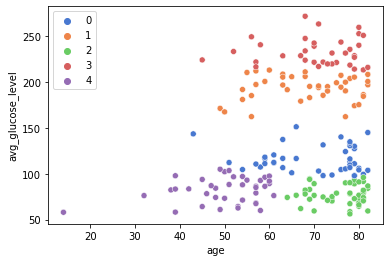

In [93]:
# Com relação aos indivíduos que tiveram AVC

group_Kmeans(stroke_1,"age", "avg_glucose_level",5)

Aumento das ocorrências de desregularidade da glicose com forme a idade aumenta. 

Agrupando os dados com base nas colunas **hypertension(hipertensão)** e **age(idade)**

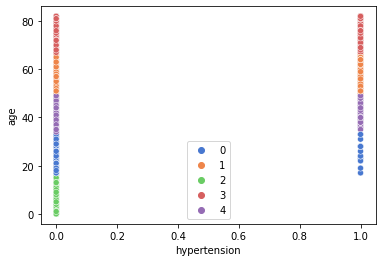

In [94]:
# Com relação a todo o database
group_Kmeans(db,"hypertension", "age",5)

Legenda:
- 0.0 = Não hipertenso

- 1.0 = Hipertenso

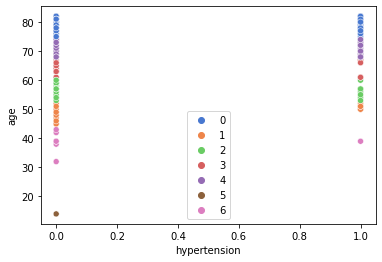

In [95]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"hypertension", "age",7)

Legenda:
- 0.0 = Não hipertenso

- 1.0 = Hipertenso

Primeiras ocorrências por volta  dos 20 anos. Além disso, Pessoas com hipertensão que tiveram AVC aparecencem apenas a partir dos, aproximadamente, 37 anos.

Agrupando os dados com base nas colunas **heart_disease(doenças cardíacas)** e **age(idade)**

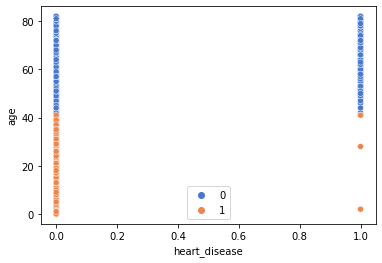

In [96]:
# Com relação a todo o database
group_Kmeans(db,"heart_disease", "age",2)

Legenda:
- 0.0 = Não cardíaco

- 1.0 = Cardíaco

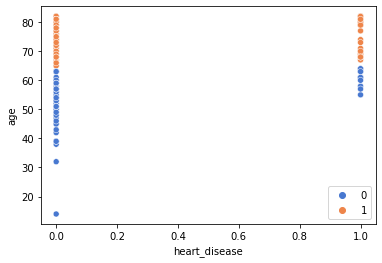

In [97]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"heart_disease", "age",2)

Legenda:
- 0.0 = Não cardíaco

- 1.0 = Cardíaco

Rarissímas ocorrências antes dos 40 anos. Além disso, Pessoas com doenças cardíacas que tiveram AVC aparecencem apenas a partir dos, aproximadamente, 55 anos.

Agrupando os dados com base nas colunas **gender(gênero)** e **age(idade)**

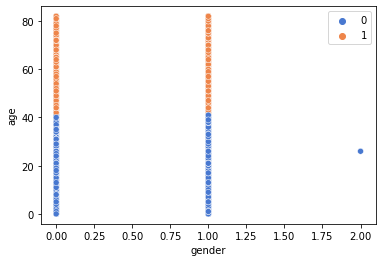

In [98]:
# Com relação a todo o database
group_Kmeans(db,"gender", "age",2)

Legenda:
- 0.00 = Mulher

- 1.00 = Homem

- 2.00 = Outros

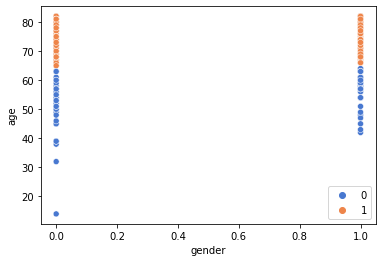

In [99]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"gender", "age",2)

Legenda:
- 0.00 = Mulher

- 1.00 = Homem

Bem distribuído.

Agrupando os dados com base nas colunas **ever_married(estado civil)** e **age(idade)**

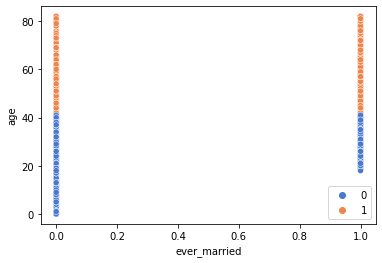

In [100]:
# Com relação a todo o database
group_Kmeans(db,"ever_married", "age",2)

Legenda:
- 0.0 = Não é casado

- 1.0 = Casado

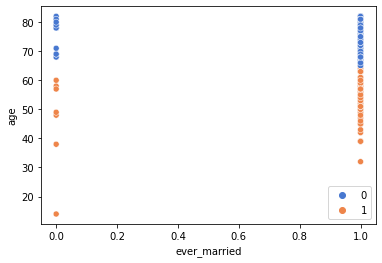

In [101]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"ever_married", "age",2)

Legenda:
- 0.0 = Não é casado

- 1.0 = Casado

Poucos casais abaixo de 20 anos.

Agrupando os dados com base nas colunas **work_type(tipo de trabalho)** e **age(idade)**

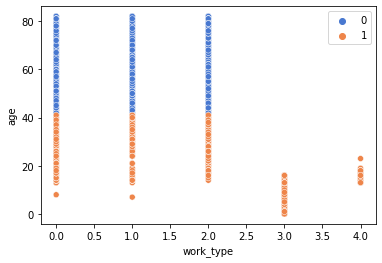

In [102]:
# Com relação a todo o database
group_Kmeans(db,"work_type", "age",2)

Legenda:
- 0.0 = Private

- 1.0 = Self-employed

- 2.0 = Govt_job

- 3.0 = children

- 4.0 = Never_worked

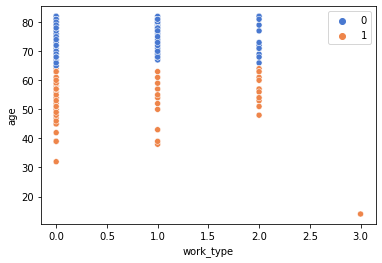

In [103]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"work_type", "age",2)

Legenda:
- 0.0 = Private

- 1.0 = Self-employed

- 2.0 = Govt_job

- 3.0 = children

- 4.0 = Never_worked

Distribuição muito equilibrada,com exceção dos indivíduos aproximadamente abaixo dos 25 anos que nunca trabalharam, seja por sem criança ou outro motivo qualquer.
obs: Números de AVCs é maior em trabalhos privados e independentes quando comparados aos servidores públicos.

Agrupando os dados com base nas colunas **Residence_type(tipo de moradia)** e **age(idade)**

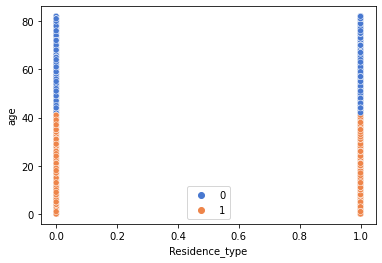

In [104]:
# Com relação a todo o database
group_Kmeans(db,"Residence_type", "age",2)

Legenda:
- 0.0 = Urbano

- 1.0 = Rural

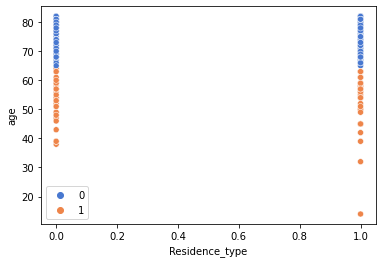

In [105]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"Residence_type", "age",2)

Legenda:
- 0.0 = Urbano

- 1.0 = Rural

Bem destribuido.

Agrupando os dados com base nas colunas **smoking_status(hábito de fumar)** e **age(idade)**

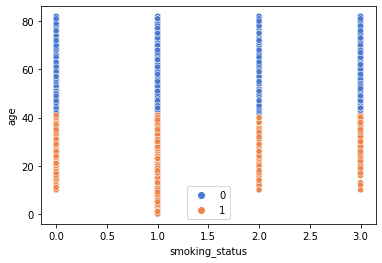

In [106]:
# Com relação a todo o database
group_Kmeans(db,"smoking_status", "age",2)

Legenda:
- 0.0 = never smoked

- 1.0 = Unknown

- 2.0 = formerly smoked

- 3.0 = smokes

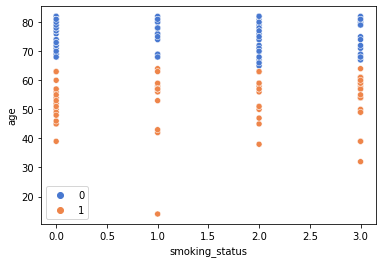

In [107]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"smoking_status", "age",2)

Legenda:
- 0.0 = never smoked

- 1.0 = Unknown

- 2.0 = formerly smoked

- 3.0 = smokes

Antes dos 10 anos a maioria não sabe, nos maiores de 10 anos estam bem distribuidos.

## Glicose

Agrupando os dados com base nas colunas **bmi (imc)** e **avg_glucose_level (nível de glicose)**:

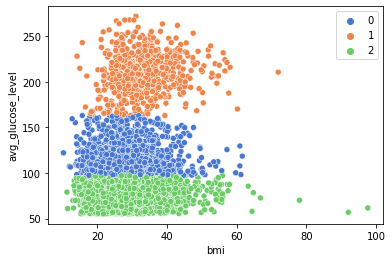

In [108]:
# Com relação a todo o database

group_Kmeans(db,"bmi", "avg_glucose_level",3)

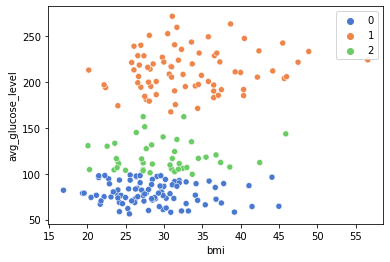

In [109]:
# Com relação aos indíviduos que tiveram AVC

group_Kmeans(stroke_1,"bmi", "avg_glucose_level",3)

Com o aumento do BMI nota-se uma maior ocorrência de glicose alta.

Agrupando os dados com base nas colunas **hypertension(hipertensão)** e **avg_glucose_level (nível de glicose)**

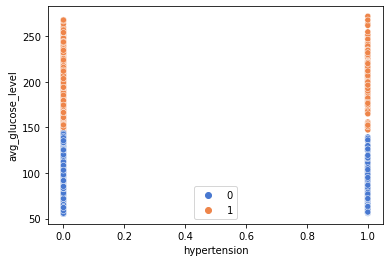

In [110]:
# Com relação a todo o database
group_Kmeans(db,"hypertension", "avg_glucose_level",2)

Legenda:
- 0.0 = Não hipertenso

- 1.0 = Hipertenso

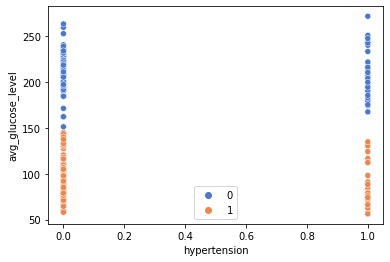

In [111]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"hypertension", "avg_glucose_level",2)

Legenda:
- 0.0 = Não hipertenso

- 1.0 = Hipertenso

Agrupando os dados com base nas colunas **gender(gênero)** e **avg_glucose_level (nível de glicose)**

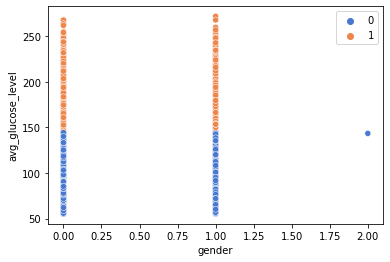

In [112]:
# Com relação a todo o database
group_Kmeans(db,"gender", "avg_glucose_level",2)

Legenda:
- 0.00 = Mulher

- 1.00 = Homem

- 2.00 = Outros

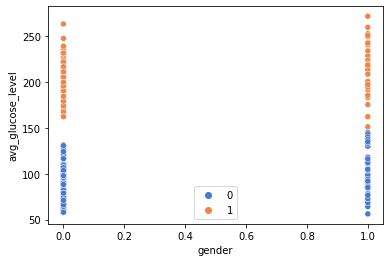

In [113]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"gender", "avg_glucose_level",2)

Legenda:
- 0.00 = Mulher

- 1.00 = Homem

Agrupando os dados com base nas colunas **heart_disease(doenças cardíacas)** e **avg_glucose_level (nível de glicose)**

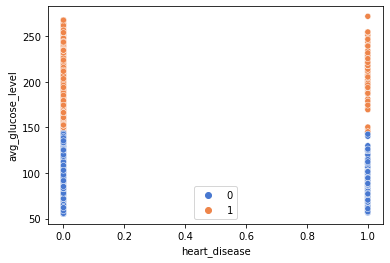

In [114]:
# Com relação a todo o database
group_Kmeans(db,"heart_disease", "avg_glucose_level",2)

Legenda:
- 0.0 = Não cardíaco

- 1.0 = Cardíaco

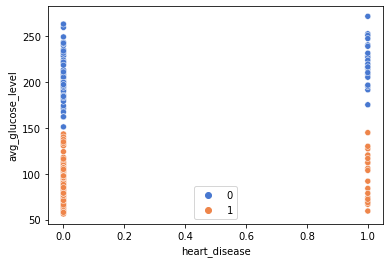

In [115]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"heart_disease", "avg_glucose_level",2)

Legenda:
- 0.0 = Não cardíaco

- 1.0 = Cardíaco

Agrupando os dados com base nas colunas **ever_married(estado civil)** e **avg_glucose_level (nível de glicose)**

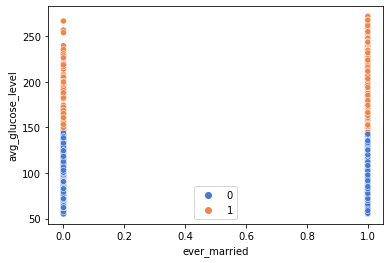

In [116]:
# Com relação a todo o database
group_Kmeans(db,"ever_married", "avg_glucose_level",2)

Legenda:
- 0.0 = Não é casado

- 1.0 = Casado

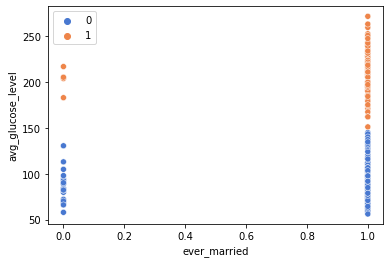

In [117]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"ever_married", "avg_glucose_level",2)

Legenda:
- 0.0 = Não é casado

- 1.0 = Casado

Não casados tem niveis de glicose bem mais baixos e controlados do que casados.

Agrupando os dados com base nas colunas **work_type(tipo de trabalho)** e **avg_glucose_level (nível de glicose)**

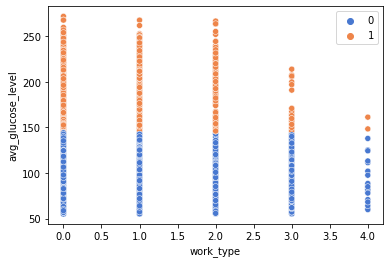

In [118]:
# Com relação a todo o database
group_Kmeans(db,"work_type", "avg_glucose_level",2)

Legenda:
- 0.0 = Private

- 1.0 = Self-employed

- 2.0 = Govt_job

- 3.0 = children

- 4.0 = Never_worked

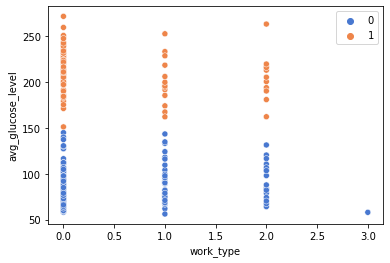

In [119]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"work_type", "avg_glucose_level",2)

Legenda:
- 0.0 = Private

- 1.0 = Self-employed

- 2.0 = Govt_job

- 3.0 = children

- 4.0 = Never_worked

Os níveis de glicose vairiam de acordo com cada tipo de trabalho.

Agrupando os dados com base nas colunas **Residence_type(tipo de moradia)** e **avg_glucose_level (nível de glicose)**

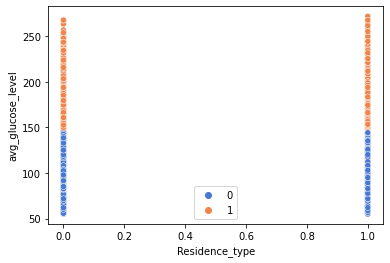

In [120]:
# Com relação a todo o database
group_Kmeans(db,"Residence_type", "avg_glucose_level",2)

Legenda:
- 0.0 = Urbano

- 1.0 = Rural

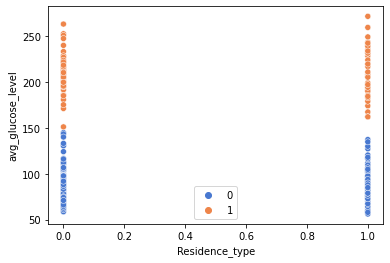

In [121]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"Residence_type", "avg_glucose_level",2)

Legenda:
- 0.0 = Urbano

- 1.0 = Rural

Agrupando os dados com base nas colunas **smoking_status(hábito de fumar)** e **avg_glucose_level (nível de glicose)**

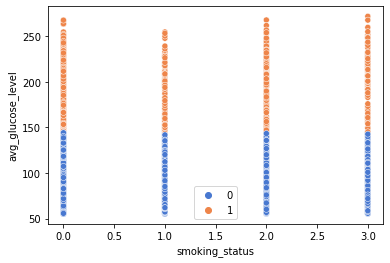

In [122]:
# Com relação a todo o database
group_Kmeans(db,"smoking_status", "avg_glucose_level",2)

Legenda:
- 0.0 = never smoked

- 1.0 = Unknown

- 2.0 = formerly smoked

- 3.0 = smokes

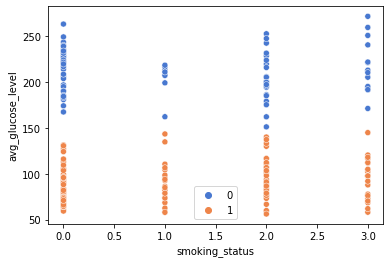

In [123]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"smoking_status", "avg_glucose_level",2)

Legenda:
- 0.0 = never smoked

- 1.0 = Unknown

- 2.0 = formerly smoked

- 3.0 = smokes

## BMI

Agrupando os dados com base nas colunas **bmi (imc)** e **smoking_status(hábito de fumar)**:

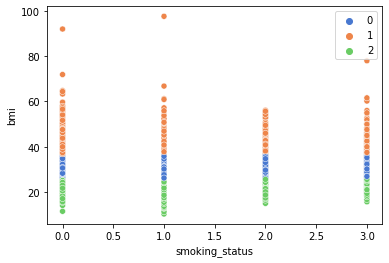

In [124]:
# Com relação a todo o database
group_Kmeans(db,"smoking_status", "bmi",3)

Legenda:
- 0.0 = never smoked

- 1.0 = Unknown

- 2.0 = formerly smoked

- 3.0 = smokes

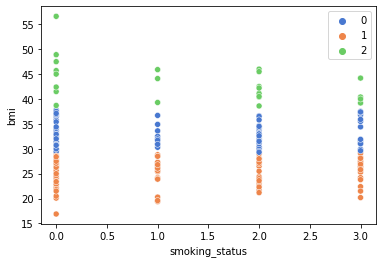

In [125]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"smoking_status", "bmi",3)

Legenda:
- 0.0 = never smoked

- 1.0 = Unknown

- 2.0 = formerly smoked

- 3.0 = smokes

Agrupando os dados com base nas colunas **bmi (imc)** e **gender(gênero)**:

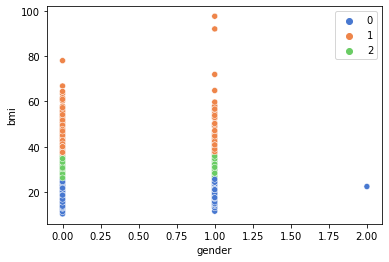

In [126]:
# Com relação a todo o database
group_Kmeans(db,"gender", "bmi",3)

Legenda:
- 0.00 = Mulher

- 1.00 = Homem

- 2.00 = Outros

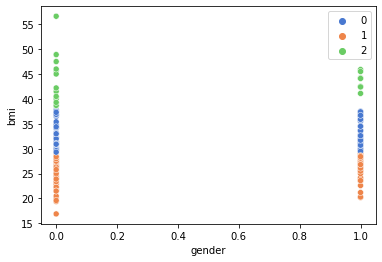

In [127]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"gender", "bmi",3)

Legenda:
- 0.00 = Mulher

- 1.00 = Homem

Agrupando os dados com base nas colunas **bmi (imc)** e **heart_disease(doenças cardíacas)**:

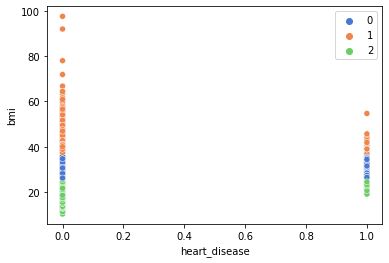

In [128]:
# Com relação a todo o database
group_Kmeans(db,"heart_disease", "bmi",3)

Legenda:
- 0.0 = Não cardíaco

- 1.0 = Cardíaco

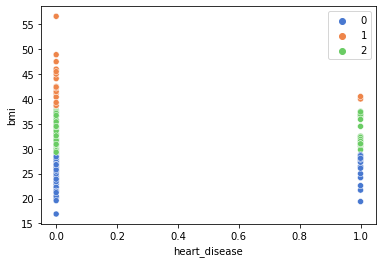

In [129]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"heart_disease", "bmi",3)

Legenda:
- 0.0 = Não cardíaco

- 1.0 = Cardíaco

Variação de IMC de quem tem doenças cardíacas é menor dos indivíduos que não tem.

Agrupando os dados com base nas colunas **bmi (imc)** e **hypertension(hipertensão)**:

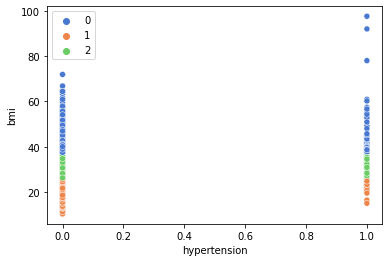

In [130]:
# Com relação a todo o database
group_Kmeans(db,"hypertension", "bmi",3)

Legenda:
- 0.0 = Não hipertenso

- 1.0 = Hipertenso

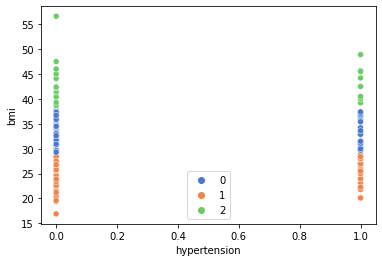

In [131]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"hypertension", "bmi",3)

Legenda:
- 0.0 = Não hipertenso

- 1.0 = Hipertenso

Agrupando os dados com base nas colunas **bmi (imc)** e **work_type(tipo de trabalho)**:

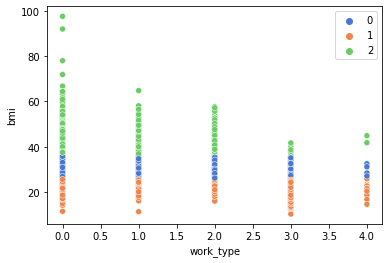

In [132]:
# Com relação a todo o database
group_Kmeans(db,"work_type", "bmi",3)

Legenda:
- 0.0 = Private

- 1.0 = Self-employed

- 2.0 = Govt_job

- 3.0 = children

- 4.0 = Never_worked

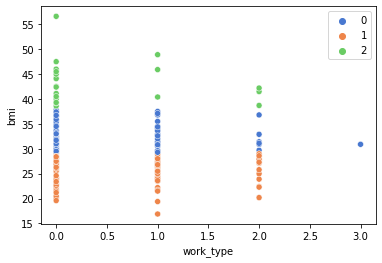

In [133]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"work_type", "bmi",3)

Legenda:
- 0.0 = Private

- 1.0 = Self-employed

- 2.0 = Govt_job

- 3.0 = children

- 4.0 = Never_worked

O IMC varia conforme o o tipo de trabalho.

Agrupando os dados com base nas colunas **bmi (imc)** e **ever_married(estado civil)**:

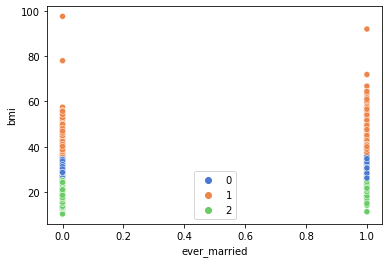

In [134]:
# Com relação a todo o database
group_Kmeans(db,"ever_married", "bmi",3)

Legenda:
- 0.0 = Não é casado

- 1.0 = Casado

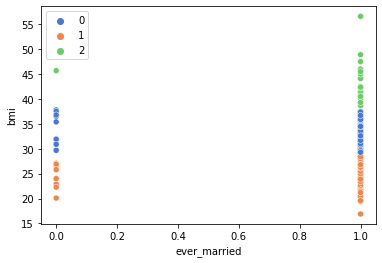

In [135]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"ever_married", "bmi",3)

Legenda:
- 0.0 = Não é casado

- 1.0 = Casado

Indivíduos solteiros tem seus IMC em média menos que os casados.

Agrupando os dados com base nas colunas **bmi (imc)** e **Residence_type(tipo de residência)**:

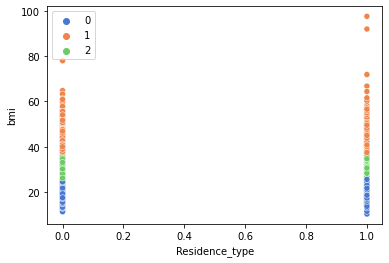

In [136]:
# Com relação a todo o database
group_Kmeans(db,"Residence_type", "bmi",3)

Legenda:
- 0.0 = Urbano

- 1.0 = Rural

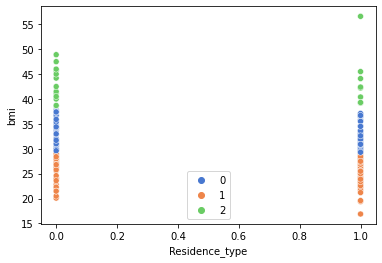

In [137]:
# Com relação aos indíviduos que tiveram AVC
group_Kmeans(stroke_1,"Residence_type", "bmi",3)

Legenda:
- 0.0 = Urbano

- 1.0 = Rural

***Com os agrupamentos anteriormente apresentados se pode fazer a montagem de perfis?***

# Montagem de Perfis

### Jovens

Entre 0 e 10 anos :

    BMI :                Abaixo de 40
    Glicose:             Entre 50 e 140
    Hipertensão:         Não
    Doenças Cardíacas:   Não
    Gênero:              Ambos os gêneros
    Estado civil:        Não casado
    Tipo de trabalho:    crianças(nunca trabalharam)
    Tipo de residencia:  Ambos os tipos(urbano e rural)
    Hábito de fumar:     Não sabem
    
    Baixissímas ocorrências de AVC 
    
    
Entre 10 e 20 anos :

    BMI :                Abaixo de 50
    Glicose:             Entre 55 e 150
    Hipertensão:         Não (Pouquíssimas ocorrências)
    Doenças Cardíacas:   Não (Pouquíssimas ocorrências)
    Gênero:              Ambos os gêneros
    Estado civil:        Não casado (Maioria)
    Tipo de trabalho:    nunca trabalharam (Algumas ocorrências de outros tipos)
    Tipo de residencia:  Ambos os tipos(urbano e rural)
    Hábito de fumar:     Não há como estipular
    
    Baixissímas ocorrências de AVC 

### Adultos

Entre 20 e 30 anos :

    BMI :                Entre 15 e 60
    Glicose:             Entre 55 e 160
    Hipertensão:         Não (poucas ocerrências)
    Doenças Cardíacas:   Não (Poquíssimas ocerrências)
    Gênero:              Ambos os gêneros
    Estado civil:        casado (muitos casos)
    Tipo de trabalho:    Não há como estipular
    Tipo de residencia:  Ambos os tipos(urbano e rural)
    Hábito de fumar:     Não há como estipular
    
    Baixissímas ocorrências de AVC  

Entre 30 e 40 anos :

    BMI :                Aproximadamente entre 20 e 60 
    Glicose:             Entre 55 e 200
    Hipertensão:         Não (algumas ocorrências)
    Doenças Cardíacas:   Não (Pouquíssimas ocorrências)
    Gênero:              Ambos os gêneros
    Estado civil:        casado (muitos casos)
    Tipo de trabalho:    Não há como estipular
    Tipo de residencia:  Ambos os tipos(urbano e rural)
    Hábito de fumar:     Não há como estipular
    
    Baixas ocorrências de AVC  

Entre 40 e 50 anos :
    
    BMI :                Aproximadamente entre 20 e 60 
    Glicose:             Entre 55 e 220
    Hipertensão:         Não (algumas ocorrências)
    Doenças Cardíacas:   Não (algumas ocorrências)
    Gênero:              Ambos os gêneros
    Estado civil:        casado (muitos casos)
    Tipo de trabalho:    Não há como estipular
    Tipo de residencia:  Ambos os tipos(urbano e rural)
    Hábito de fumar:     Não há como estipular
    
    algumas ocorrências de AVC 

Entre 50 e 60 anos :

    BMI :                Abaixo de 55
    Glicose:             Entre 55 e 230
    Hipertensão:         Sim (muitas ocorrências)
    Doenças Cardíacas:   Sim (muitas ocorrências)
    Gênero:              Ambos os gêneros
    Estado civil:        casado (muitos casos)
    Tipo de trabalho:    Não há como estipular
    Tipo de residencia:  Ambos os tipos(urbano e rural)
    Hábito de fumar:     Não há como estipular
    
    Risco considerável de AVC  


### Idosos

Entre 60 e 70 anos :

    BMI :                Abaixo de 55
    Glicose:             Entre 55 e 240
    Hipertensão:         Sim (muitas ocorrências)
    Doenças Cardíacas:   Sim (muitas ocorrências)
    Gênero:              Ambos os gêneros
    Estado civil:        casado (muitos casos)
    Tipo de trabalho:    Não há como estipular
    Tipo de residencia:  Ambos os tipos(urbano e rural)
    Hábito de fumar:     Não há como estipular
  
    Muitas ocorrências de AVC

Superior a 70 anos :

    BMI :                Abaixo de 50
    Glicose:             Entre 55 e 250
    Hipertensão:         Sim (muitas ocorrências)
    Doenças Cardíacas:   Sim (muitas ocorrências)
    Gênero:              Ambos os gêneros
    Estado civil:        casado (muitos casos)
    Tipo de trabalho:    Não há como estipular
    Tipo de residencia:  Ambos os tipos(urbano e rural)
    Hábito de fumar:     Não há como estipular
    
    Muitissímas ocorrências de AVC 

### Perfis complementares

Tipo de trabalho:

Indivíduos que o tipo de trabalho é privado tem uma maior chance que terem AVC mais cedo que os demais tipos.

Indivíduos que o tipo de trabalho é privado tem níveis de glicose mais elevados do que os demais tipos.

Indivíduos que o tipo de trabalho é público(gov_job) tem menos chance que terem AVC mais cedo que os demais tipos.

Indivíduos que o tipo de trabalho é público(gov_job) tem níveis de glicose mais baixos que os demais tipos.


Estado civil:

Indivíduos com mais de 30 anos tem mais chance de ser casado do que pessoas com menos idade.

Indivíduos Não casados tem niveis de glicose bem mais baixos e controlados do que casados.

Indivíduos solteiros tem seus IMC em média menos que os casados.


Hábito de fumar:

Indivíduos que fumam tem chances de terem AVC mais cedo do que que nunca fumou.


Tipo de moradia:

Indivíduos que moram na área urbana tem uma maior chance que terem AVC mais cedo


BMI:

Indivíduos com maoir IMCs tendem a ter maiores taxas de glicose.

Indivíduos que o tipo de trabalho é privado tem em média um IMC maior que os demais tipos.

Indivíduos que nunca trabalharam e crianças tem em média um IMC menor que os demais tipos.

Indivíduos quem tem doenças cardíacas, em média, tem IMC menor que os indivíduos que não tem.

# Aplicação de Modelos de Machine Learning

## 1. Pré-processamento do Dataset

In [138]:

pred_db = pred_db.sample(frac=1)
pred_db.drop('id', axis=1, inplace=True)
pred_db

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
844,Male,1,0,0,0,children,Rural,89.30,21.4,Unknown,0
224,Male,49,0,0,0,Private,Rural,104.86,31.9,smokes,1
743,Male,23,0,0,0,Private,Rural,96.78,24.6,smokes,0
23,Male,82,0,1,1,Private,Rural,208.30,32.5,Unknown,1
761,Female,37,0,0,0,Private,Rural,92.78,54.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
739,Female,55,0,0,1,Private,Urban,55.34,27.1,smokes,0
737,Male,42,0,0,1,Private,Urban,78.49,31.8,smokes,0
839,Female,19,0,0,1,Private,Rural,90.42,21.4,never smoked,0
90,Female,79,0,1,1,Private,Urban,226.98,29.8,never smoked,1


In [139]:
pred_db['gender'] = pred_db['gender'].replace(['Female', 'Male'], [0, 1])

In [140]:
pred_db['work_type'] = pred_db['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
                                                    [4, 2, 3, 1, 0])

In [141]:
pred_db['Residence_type'] = pred_db['Residence_type'].replace(['Urban', 'Rural'], [0, 1])

In [142]:
pred_db["smoking_status"] = pred_db["smoking_status"].replace(['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
                                                            [3, 2, 0, 1])

In [143]:
pred_db.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
844,1,1,0,0,0,1,1,89.30,21.4,2,0
224,1,49,0,0,0,4,1,104.86,31.9,1,1
743,1,23,0,0,0,4,1,96.78,24.6,1,0
23,1,82,0,1,1,4,1,208.30,32.5,2,1
761,0,37,0,0,0,4,1,92.78,54.2,3,0


Nesse ponto, separaremos as colunas de acordo com:

    x - variáveis preditivas;
    y - variável alvo.

In [144]:
y = pred_db['stroke']
x = pred_db.drop('stroke', axis=1)

Como vamos ter dois modelos de machining learning façamos dois Database pra trabalhar separadamente com cada uma.

In [145]:
pred_db_lasso = pred_db

### 2. Regressão de Lasso

In [146]:
lasso_x = pred_db.drop('stroke', axis=1)
lasso_X = pred_db.drop('stroke', axis=1).values

In [147]:
from sklearn.linear_model import Lasso

In [148]:
modelo_1 = Lasso(alpha=0.5)
modelo_1.fit(lasso_x,y)

Lasso(alpha=0.5)

In [149]:
score_lambda = modelo_1.score(lasso_x,y)
score_lambda

0.4257101593798569

In [150]:
#Verificando qual valor é o mais eficiente para o lambda
lambdas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1]

In [151]:
scores = []
for i in range(len(lambdas)):
    modelo_1 = Lasso(alpha=lambdas[i])
    modelo_1.fit(lasso_x,y)
    score = modelo_1.score(lasso_x,y)
    scores.append(score)

(1e-05, 10)

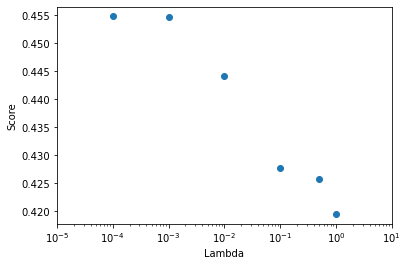

In [152]:
plt.scatter(lambdas,scores);
plt.xlabel("Lambda");
plt.ylabel('Score');
plt.xscale('log');
plt.xlim([1e-5,10])

Modelo com lambda = 0.0001 apresentou o melhor score

In [153]:
modelo_final = Lasso(alpha=0.0001)
modelo_final.fit(lasso_x,y)
lasso_pred = modelo_final.predict(lasso_x)

Vamos visualizar como a regressão de lasso está se comportando em relação aos atributos:

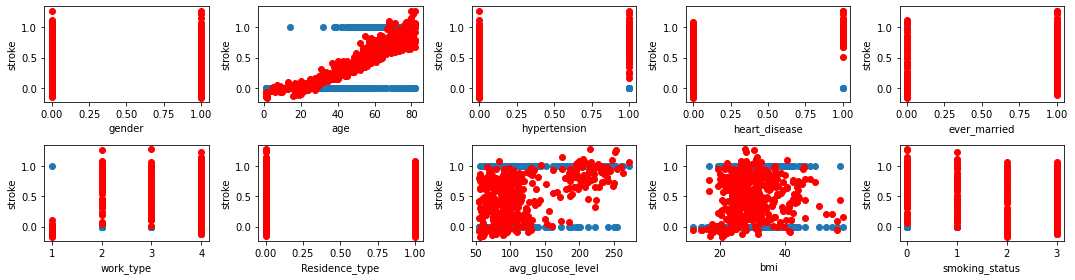

In [154]:
fig, ax = plt.subplots(2,5,figsize=(15, 4))
ax[0][0].scatter(lasso_X[:,0],y);
ax[0][0].scatter(lasso_X[:,0],lasso_pred, color ='red');
ax[0][0].set_xlabel('gender');
ax[0][0].set_ylabel('stroke');

ax[0][1].scatter(lasso_X[:,1],y);
ax[0][1].scatter(lasso_X[:,1],lasso_pred, color = 'red');
ax[0][1].set_xlabel('age');
ax[0][1].set_ylabel('stroke');

ax[0][2].scatter(lasso_X[:,2],y);
ax[0][2].scatter(lasso_X[:,2],lasso_pred,color ='red');
ax[0][2].set_xlabel('hypertension');
ax[0][2].set_ylabel('stroke');

ax[0][3].scatter(lasso_X[:,3],y);
ax[0][3].scatter(lasso_X[:,3],lasso_pred,color ='red');
ax[0][3].set_xlabel('heart_disease');
ax[0][3].set_ylabel('stroke');

ax[0][4].scatter(lasso_X[:,4],y);
ax[0][4].scatter(lasso_X[:,4],lasso_pred,color ='red');
ax[0][4].set_xlabel('ever_married');
ax[0][4].set_ylabel('stroke');

ax[1][0].scatter(lasso_X[:,5],y);
ax[1][0].scatter(lasso_X[:,5],lasso_pred, color ='red');
ax[1][0].set_xlabel('work_type');
ax[1][0].set_ylabel('stroke');

ax[1][1].scatter(lasso_X[:,6],y);
ax[1][1].scatter(lasso_X[:,6],lasso_pred, color = 'red');
ax[1][1].set_xlabel('Residence_type');
ax[1][1].set_ylabel('stroke');

ax[1][2].scatter(lasso_X[:,7],y);
ax[1][2].scatter(lasso_X[:,7],lasso_pred,color ='red')
ax[1][2].set_xlabel('avg_glucose_level');
ax[1][2].set_ylabel('stroke');

ax[1][3].scatter(lasso_X[:,8],y);
ax[1][3].scatter(lasso_X[:,8],lasso_pred,color ='red');
ax[1][3].set_xlabel('bmi');
ax[1][3].set_ylabel('stroke');

ax[1][4].scatter(lasso_X[:,9],y);
ax[1][4].scatter(lasso_X[:,9],lasso_pred,color ='red');
ax[1][4].set_xlabel('smoking_status');
ax[1][4].set_ylabel('stroke');

plt.tight_layout();

In [155]:
lasso_x[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
844,1,1,0,0,0,1,1,89.30,21.4,2
224,1,49,0,0,0,4,1,104.86,31.9,1
743,1,23,0,0,0,4,1,96.78,24.6,1
23,1,82,0,1,1,4,1,208.30,32.5,2
761,0,37,0,0,0,4,1,92.78,54.2,3


In [156]:
y[:5]

844    0
224    1
743    0
23     1
761    0
Name: stroke, dtype: int64

In [157]:
modelo_final.predict(lasso_x[:5])*100

array([-13.20850926,  41.49287672,   5.65586794, 105.57006088,
        21.22425377])

In [158]:
test = []
test = modelo_final.predict(lasso_x)>np.mean(lasso_pred)

Verificando a precisão e cobertura desse modelo

In [159]:
verify = 0
failed = 0
for i in range(418):
    if test[i] == True and y.values[i] == 1:
        verify +=1
    elif test [i] == False and y.values[i] == 0:
        verify +=1
    else:
        failed += 1
        
margem = verify / len(y.values) * 100
print("Acuracy: {:.1f}% ".format(margem))

Acuracy: 81.3% 


Temos uma acurácia satisfatória, e se aplicássemos a regressão de lasso como atributo em um dos modelos, ajudaria na predição?

In [160]:
pred_db_lasso['stroke_scalar'] = lasso_pred > .5
lasso_x_etc = pred_db_lasso.drop('stroke', axis=1)
pred_db_lasso.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_scalar
844,1,1,0,0,0,1,1,89.30,21.4,2,0,False
224,1,49,0,0,0,4,1,104.86,31.9,1,1,False
743,1,23,0,0,0,4,1,96.78,24.6,1,0,False
23,1,82,0,1,1,4,1,208.30,32.5,2,1,True
761,0,37,0,0,0,4,1,92.78,54.2,3,0,False


### Criando funções para verificar a precisão e cobertura

In [161]:
from random import sample

def acuracy(model, atrib_test, val_test, quant):
    averages = []
    
    for i in range(quant):
        index = sample(range(len(atrib_test)), 5)
        
        predict = model.predict(atrib_test.iloc[index])
        result = val_test.iloc[index]
        
        mean = (predict == result).sum() * 20
        averages.append(mean)
    
    return np.mean(averages)

In [162]:
def score(model, atrib_train, val_train, atrib_test, val_test, quant):
    scores = []
    for i in range(quant):
        m = model
        m.fit(atrib_train, val_train)

        scores.append(acuracy(m, atrib_test, val_test, 20))

    return np.mean(scores)

#### Treinamento para o modelo ExtraTreesClassfier

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
# Criando os conjuntos de dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(lasso_x_etc, y, test_size = 0.4)

In [165]:
# Verificando a separação do conjunto de amostras
len(x_train.index) + len(x_test.index) == len(x.index)

True

## 3. Árvore de Decisão

In [166]:
from sklearn.ensemble import ExtraTreesClassifier

In [167]:
# Criação do modelo
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

ExtraTreesClassifier()

Verificando a importância de cada atributo no modelo de árvore de decisão:

In [168]:
attrib = lasso_x_etc.columns.to_list()
importances = model.feature_importances_

for a, i in zip(attrib, importances):
    print('{} = {:.2f}%'.format(a.title(), i * 100))

Gender = 3.68%
Age = 22.70%
Hypertension = 3.66%
Heart_Disease = 2.31%
Ever_Married = 3.21%
Work_Type = 5.14%
Residence_Type = 3.36%
Avg_Glucose_Level = 13.56%
Bmi = 12.07%
Smoking_Status = 6.69%
Stroke_Scalar = 23.62%


In [169]:
# Imprimindo resultado
result = model.score(x_test, y_test)
print('Acurácia:', round(result * 100, 2))

Acurácia: 77.98


In [170]:
x_test[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke_scalar
41,1,54,0,0,1,4,0,71.22,28.5,3,False
35,0,82,1,1,0,4,1,84.03,26.5,0,True
754,0,35,0,0,1,4,1,82.69,29.1,2,False
184,1,61,1,1,1,4,0,112.24,37.4,1,True
206,0,81,0,0,1,4,1,80.13,23.4,3,True


In [171]:
prediction = model.predict(x_test[0:5])
prediction

array([0, 1, 0, 1, 1], dtype=int64)

In [172]:
y_test[:5]

41     1
35     1
754    0
184    1
206    1
Name: stroke, dtype: int64

Verificando a precisão e cobertura do modelo

In [173]:
acuracy(model, x_test, y_test, 50)

81.2

In [174]:
score(ExtraTreesClassifier(), x_train, y_train, x_test, y_test, 5)

76.6

Foi obtido resultados satisfatórios na aplicação desse modelo


#### Treinamento para o modelo Multi-layer Perceptron

Retirada de alguns valores contínuos que estavam prejudicando o classificador

In [175]:
x = x.drop('avg_glucose_level',axis=1)
x = x.drop('bmi',axis=1)

In [176]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
844,1,1,0,0,0,1,1,2
224,1,49,0,0,0,4,1,1
743,1,23,0,0,0,4,1,1
23,1,82,0,1,1,4,1,2
761,0,37,0,0,0,4,1,3


In [177]:
# Só recriamos pois como não temos a coluna "stroke_scalar" vamos precisar de novos dados de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [178]:
# Verificando a separação do conjunto de amostras
len(x_train.index) + len(x_test.index) == len(x.index)

True

## 4. Rede Neural Multi-layer Perceptron

In [225]:
from sklearn.neural_network import MLPClassifier

In [226]:
clf = MLPClassifier(solver='adam', alpha=1e-5,activation='logistic', max_iter= 1000)

In [227]:
clf.fit(x, y)

MLPClassifier(activation='logistic', alpha=1e-05, max_iter=1000)

In [228]:
x_test[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
758,1,47,0,0,1,3,1,3
813,1,41,0,0,0,3,0,3
236,1,57,0,0,1,4,0,2
789,0,54,0,0,1,4,1,3
131,0,78,1,0,0,4,0,3


In [229]:
proba = clf.predict_proba(x_test[:5])*100
proba

array([[82.18305957, 17.81694043],
       [83.80002806, 16.19997194],
       [54.89027758, 45.10972242],
       [74.21209774, 25.78790226],
       [17.991323  , 82.008677  ]])

In [230]:
clf.predict(x_test[:5])

array([0, 0, 0, 0, 1], dtype=int64)

In [231]:
y_test[:5]

758    0
813    0
236    1
789    0
131    1
Name: stroke, dtype: int64


Verificando a precisão e cobertura desse modelo

In [243]:
acuracy(clf, x_test, y_test, 100)

80.4

In [242]:
score(clf, x_train, y_train, x_test, y_test, 5)

71.6

#### Analisando o comportamento da rede neural em relação a colunas com valores contínuos 

Tomemos um indivíduo como referência para verificar o impacto da alteração do atributos contínuo restante na previsão da possibilidade de se ter um AVC. Adotamos, inicialmente, as seguintes características:
- Gênero masculino (1)
- Não hipertenso (0)
- Sem histórico de doenças do coração (0)
- Solteiro (0)
- Trabalha em empresa privada (0)
- Residindo em meio urbano (0)
- Glicemia em 85 mg/dL
- Índice de massa corpórea em 22
- Nunca fumou (0)

In [234]:
attr = {'Idade':list(range(int(db.age.min()), int((db.age.max()))))}

In [235]:
proba_age = [clf.predict_proba([[1, i, 0, 0, 0, 0, 0, 0]])[0][1]*100 for i in attr['Idade']]

attr['Idade'] = [attr['Idade'], proba_age]

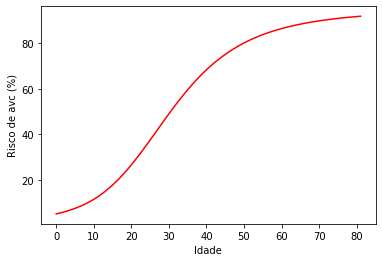

In [236]:
plt.plot(attr['Idade'][0],attr['Idade'][1], color='red');
plt.xlabel("Idade");
plt.ylabel('Risco de avc (%)');

**O que faz todo sentido, pois como mostrado nos gráficos, quanto maior a idade, maior as chances.**

## Interface

#### Aplicando a rede neural para fazer a interface:

In [191]:
import datetime
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
from ipywidgets import IntSlider
style = {'description_width': 'initial'}
import ipywidgets as widgets
# defining some widgets
menu_gender = widgets.Dropdown(
    options={"Female":0,"Male":1},
    description='Your Gender:')
calendar = widgets.DatePicker(
           description='Date of birth: ')
checkbox = widgets.Checkbox(
           description='Check to invert',style = style)
menu_hipertension = widgets.Dropdown(
    options={"Yes":1,"No":0},
    description='Have hypertension?',style = style)
menu_heart_disease = widgets.Dropdown(
    options={"Yes":1,"No":0},
    description='Have heart disease?', style = style)
menu_ever_married = widgets.Dropdown(
    options={"Yes":0,"No":1},
    description='You married?')
menu_work_type = widgets.Dropdown(
    options={'Private': 0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never worked':4},
    description='What you work type? ',style = style)
menu_residence_type = widgets.Dropdown(
    
    options={'Urban': 0, 'Rural':1},
    description='What you residence type?',style = style)
menu_smoke_status = widgets.Dropdown(
    options={'Never smoke': 3, 'Unknown':2, 'formaly smoked':0, 'smokes':1},
    description='Smoke status:',style = style)

buttonuser_info = widgets.Button(description='Result')
outuser_info = widgets.Output()
def on_buttonuser_info_clicked(b):
    if type(calendar.value) != (datetime.date):
        return display(Markdown("Please enter a date!"))        
    with outuser_info:
        year_user = calendar.value.year
        year_today = datetime.date.today().year
        user_month = calendar.value.month
        month_today = datetime.date.today().month
        user_day = calendar.value.day
        day_today = datetime.date.today().day
        age = year_today - year_user
       
        if user_month >= month_today:
            if user_day <= day_today:
                age -= 1
        result = [[menu_gender.value, age, menu_hipertension.value, menu_heart_disease.value ,menu_ever_married.value,
               menu_work_type.value, menu_residence_type.value, menu_smoke_status.value]]
        proba = (clf.predict_proba(result))*100
        display(Markdown("Your probability of having a stroke is: {:.1f}%\n \
                        \nOur prediction has an accuracy of {}% hits.But don't worry, we can get it wrong :)" .format(proba[0][1],acuracy(clf, x_test, y_test, 100))))
    

buttonuser_info.on_click(on_buttonuser_info_clicked)
display(widgets.VBox([menu_gender, calendar, menu_hipertension, menu_heart_disease, menu_ever_married, menu_work_type,
                    menu_residence_type, menu_smoke_status,buttonuser_info,outuser_info]))

**Conclusão**: resumir os resultados encontrados e explicar por que são importantes. Apontar limitações, trabalhos futuros e melhorias que podem
ser feitas.